In [1]:
import pandas as pd

In [2]:
filepath = "C:\\Users\\abdelilah\\Desktop\\Python Projects\\Police\\"

In [3]:
police_df = pd.read_csv(filepath + "Police Data.csv", delimiter = ",")
police_df.head(10)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,3/23/2005,9:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,4/1/2005,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,6/6/2005,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,7/13/2005,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,7/13/2005,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [5]:
null_vals = dict()
for col in police_df.columns:
    null_vals[col] = police_df[col].isnull().sum()

In [6]:
null_vals

{'stop_date': 0,
 'stop_time': 0,
 'country_name': 65535,
 'driver_gender': 4061,
 'driver_age_raw': 4054,
 'driver_age': 4307,
 'driver_race': 4060,
 'violation_raw': 4060,
 'violation': 4060,
 'search_conducted': 0,
 'search_type': 63056,
 'stop_outcome': 4060,
 'is_arrested': 4060,
 'stop_duration': 4060,
 'drugs_related_stop': 0}

-----

**First Task:** Remove the column that only contains missing values.

In [7]:
#as we can see the country_name colums is missing a lot of values, lets check if the whole column is missing 
len(police_df["country_name"]) - police_df["country_name"].isnull().sum()

0

In [8]:
police_df = police_df.drop(labels = "country_name", axis = 1)

In [9]:
police_df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


-----

**Second Task:** For Speeding , were Men or Women stopped more often ? 

In [10]:
#to compare we can either do a simple numbers comparision or we can use pie/histogram chart
import matplotlib.pyplot as plt

In [11]:
speed_df = police_df[police_df["violation"] == "Speeding"]

In [12]:
# the missing values in the dataset ruined the plotting, as it can't identify it as str or int or whatever until we take out or
# replace all the missing ones, but by doing the first we risk having a mismatched shape 
# i have to go back to normal comparasions

In [13]:
mcount = 0
fcount = 0
for i in speed_df["driver_gender"]:
    if i == 'M': 
        mcount += 1 
    elif i == 'F':
        fcount += 1 
print("Cases of speeding for Male drivers is: {} , and for Female drives it's: {}".format(mcount, fcount))

Cases of speeding for Male drivers is: 25517 , and for Female drives it's: 11686


------

**Third Task:** Does gender affect who gets searched during a stop ?

In [14]:
police_df["search_conducted"].value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

In [15]:
search_df = police_df[police_df["search_conducted"] == True]

In [16]:
mcount = 0
fcount = 0
for i in search_df["driver_gender"]:
    if i == 'M': 
        mcount += 1 
    elif i == 'F':
        fcount += 1 
print("Cases of search conduct for Male drivers is: {}. \nAnd for Female drives it's: {}".format(mcount, fcount))

Cases of search conduct for Male drivers is: 2113. 
And for Female drives it's: 366


<font size="3" color='black'>There are so many other factors to consider before judging if the person driving had to go a search conduct based on their gender, like the state of that person when he got stopped, for example "did the person look like he's the influence of alcohol or any other drugs?", or "was anything in the car that alerted the police officer to order the search?". Other than that we have to consider the race of the driver, and so many other factors.</font>
<font size="3" color='green'>But if i had to say just based on these numbers alone, then yeah i would say that Men are more likely to be searched than women.</font>

-------

**Fourth Task:** What is the mean stop_duration ?

In [17]:
# first i have to check if all the durations there are in minutes or other units, then if convert everything to the same unit. 
# After that i have to add a new column where i'll get rid of the unit and just mention it in the column name. By doing that
# i'll have just the numbers alone which i'll substract to get a single number and thus calculate the mean fast.

In [38]:
import matplotlib.pyplot as plt

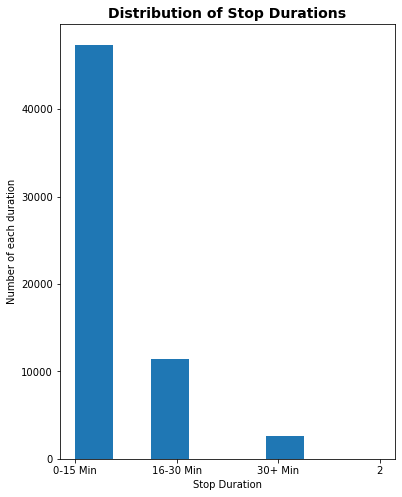

In [45]:
plt.figure(figsize = (6, 8))
plt.hist(police_df["stop_duration"].dropna(), bins = 8)
plt.title("Distribution of Stop Durations", fontsize = 14, weight = "bold")
plt.xlabel("Stop Duration")
plt.ylabel("Number of each duration")
plt.show()

In [46]:
# as we can see here the mean stoppage time is between 0 and 15min

----

**Fifth Task:** Compare the age distributions for each violation.

In [51]:
import seaborn as sns

In [19]:
violations = police_df["violation"].unique()
violations

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [20]:
age = sorted(police_df["driver_age"].dropna().unique())

In [21]:
for i in range(0,len(age)):
    age[i] = int(age[i])

In [22]:
v_df = pd.DataFrame(data = 0, index = age, columns = ['Speeding', 'Other', 'Equipment', 'Moving violation', 'nan',
       'Registration/plates', 'Seat belt'])
v_df

,Speeding,Other,Equipment,Moving violation,nan,Registration/plates,Seat belt
15,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
83,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0


In [23]:
for v in violations:
    for a in age:
        df = police_df[police_df["violation"] == v]
        df = df[df["driver_age"] == a]
        v_df.at[a, v] = df.shape[0]

In [24]:
v_df = v_df.drop("nan", axis = 1)

In [49]:
v_df = v_df.drop(v_df.columns[6], axis = 1)

In [50]:
v_df

,Speeding,Other,Equipment,Moving violation,Registration/plates,Seat belt
15,1,0,0,4,0,0
16,18,1,4,6,5,0
17,338,8,32,63,8,0
18,980,26,130,170,38,0
19,1655,52,281,331,69,0
...,...,...,...,...,...,...
83,1,0,0,1,0,0
84,3,0,0,0,0,0
85,0,0,0,1,0,0
86,3,1,0,2,0,0


In [25]:
# now i created a dataframe with all the violations as columns and ages as rows,
# and for each age and violation we have its count
# now i gotta create a histograme showing the distribution of these counts

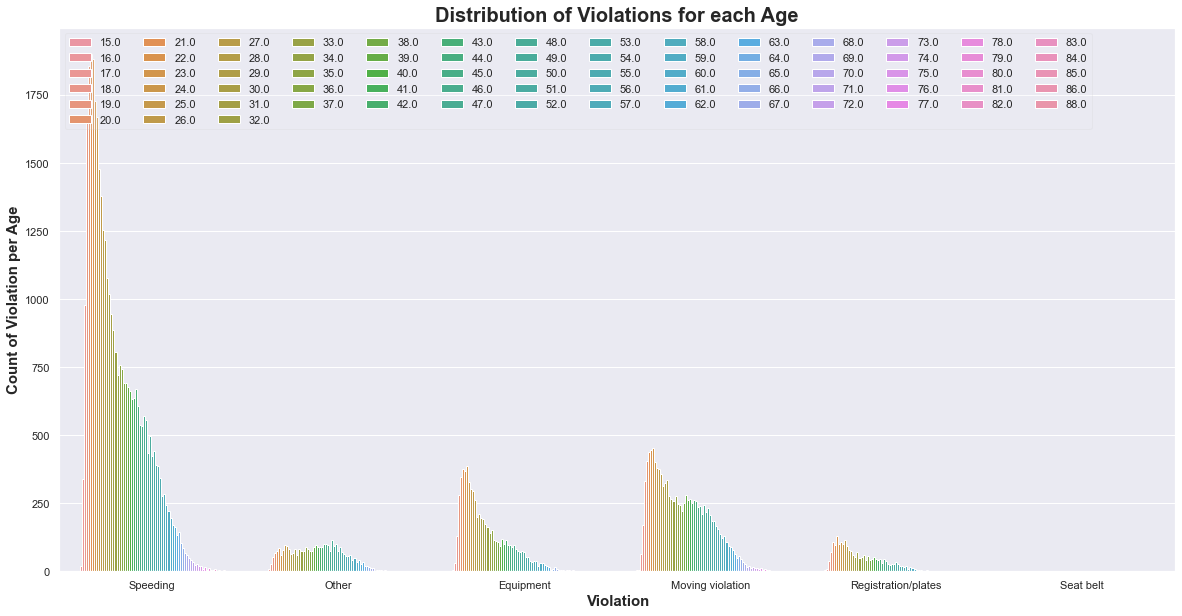

In [60]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20 , 10))
sns.countplot(x = "violation", 
              hue = "driver_age", 
              data = police_df)
plt.xlabel("Violation", 
           fontsize = 15, 
           weight = 'bold')
plt.ylabel("Count of Violation per Age", 
           fontsize = 15, 
           weight = 'bold')
plt.title('Distribution of Violations for each Age', 
          fontsize = 20, 
          weight = 'bold')
plt.legend(loc="best", framealpha = 0.2 ,ncol=len(police_df.columns))